In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_theta(X):
    thetas = []
    for i,x in enumerate(X):
        if(i == 0):
#             thetas.append((x-1)/2)
            thetas.append(-1)
        else:
            thetas.append((x+X[i-1])/2)
#     thetas.append((X[-1]+1)/2)
    thetas.append(1)
    return thetas

In [3]:
def sign(x):
    return 1 if(x>0) else -1

In [4]:
class decision_stump:
    def __init__(self):
        self.s = None
        self.theta = None
    
    def ein(self,X,Y):
        count = 0
        for i,x in enumerate(X):
            temp = self.s*sign(x-self.theta)
            if(temp != Y[i]):
                count += 1
        return count/X.shape[0]
    
    def train(self,X,Y):
        index = np.argsort(X)
        X = X[index]
        Y = Y[index]
        thetas = get_theta(X)
        
        Ein = 1
        Eout = 1
        ans = [0,0]
        for s in [1,-1]:
            self.s = s
            for theta in thetas:
                self.theta = theta
                
                if(Ein>self.ein(X,Y)):
                    Ein = min(Ein,self.ein(X,Y))
                    ans[0] = s
                    ans[1] = theta
                    
        Eout = 0.5+0.3*ans[0]*(abs(ans[1])-1)
        return Ein,Eout

In [5]:
def train_iter(iterations):
    Eins = []
    Eouts = []
    for it in range(iterations):
        X = np.random.uniform(-1,1,20)
        Y = np.sign(X)
        Y *= ((np.random.rand(20)>0.2)*2-1)
        ds = decision_stump()
        Ein,Eout = ds.train(X,Y)
        Eins.append(Ein)
        Eouts.append(Eout)
    return np.array(Eins),np.array(Eouts)

In [6]:
Eins,Eouts = train_iter(1000)

In [7]:
x = [i for i in range(1000)]
y = Eins-Eouts

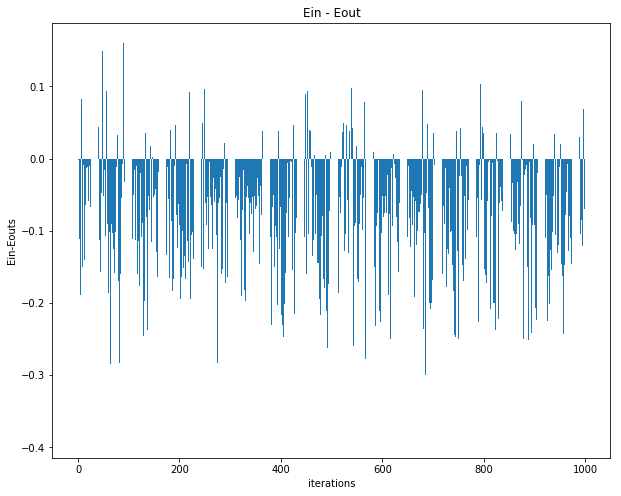

In [11]:
plt.figure(figsize=(10,8))
plt.title('Ein - Eout')
plt.xlabel('iterations')
plt.ylabel('Ein-Eouts')
plt.bar(x,y)
plt.savefig('Ein-Eout_histogram1.jpg')

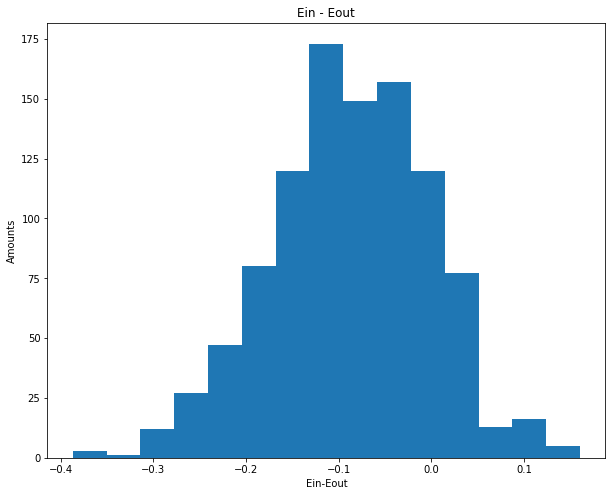

In [10]:
plt.figure(figsize=(10,8))
plt.title('Ein - Eout')
plt.xlabel('Ein-Eout')
plt.ylabel('Amounts')
plt.hist(y,15)
plt.savefig('Ein-Eout_histogram2.jpg')